<a href="https://colab.research.google.com/github/ShubhamW248/AutoEncoders/blob/main/ImageCompression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential, Model, layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
# Seeding random number generators to obtain reproducible results
seed_value = 0
os.environ["PYTHONHASHSEED"]=str(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Default matplotlib font color (change this to black if you are not using dark mode)
mpl.rcParams["text.color"] = "white"


In [2]:
def plot(test, encoded_representation, pred):
    """Plot three corresponding original, encoded and reconstructed images"""
    fig, ax = plt.subplots(3, 3)

    # Plotting parameters set to not show ticks and tick labels
    params = {"bottom": False,
              "left": False,
              "labelbottom": False,
              "labelleft": False}

    ax[0, 0].title.set_text("Original")
    ax[0, 1].title.set_text("Encoding")
    ax[0, 2].title.set_text("Predicted")

    ax[0, 0].imshow(test[0])
    ax[0, 0].tick_params(**params)
    ax[0, 1].imshow(encoded_representation[0])
    ax[0, 1].tick_params(**params)
    ax[0, 2].imshow(pred[0])
    ax[0, 2].tick_params(**params)

    ax[1, 0].imshow(test[1])
    ax[1, 0].tick_params(**params)
    ax[1, 1].imshow(encoded_representation[1])
    ax[1, 1].tick_params(**params)
    ax[1, 2].imshow(pred[1])
    ax[1, 2].tick_params(**params)

    ax[2, 0].imshow(test[2])
    ax[2, 0].tick_params(**params)
    ax[2, 1].imshow(encoded_representation[2])
    ax[2, 1].tick_params(**params)
    ax[2, 2].imshow(pred[2])
    ax[2, 2].tick_params(**params)

    plt.tight_layout()
    plt.show()

In [3]:
def create_autoencoder_model(input_shape, num_bottleneck_nodes):
    """Create autoencoder model. Returns autoencoder model and encoder model as tuple"""

    input_img = layers.Input(shape=input_shape)

    encoder = layers.Dense(num_bottleneck_nodes, activation="relu")(input_img)
    encoder_model = Model(input_img, encoder)

    decoder = layers.Dense(input_shape[0], activation="sigmoid")(encoder)
    autoencoder_model = Model(input_img, decoder)

    autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss="mse")

    return autoencoder_model, encoder_model


In [4]:
def autoencoder_workflow(num_bottleneck_nodes, num_epochs):
    """Auoencoder based reconstruction workflow for MNIST data"""

    # Load data
    (train, _), (test, _) = mnist.load_data()   # Get training and test MNIST images

    # Get original shape
    original_dims = train[0].shape

    # Normalize and reshape
    train = (train.astype(np.float32) / 255).reshape((len(train), np.prod(train.shape[1:])))
    test = (test.astype(np.float32) / 255).reshape((len(test), np.prod(test.shape[1:])))

    # Get sample dimensions
    dims = train[0].shape

    # Create model
    model, encoder = create_autoencoder_model(dims, num_bottleneck_nodes)

    # Stopping criterion via early stopping
    callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

    # Train model
    model.fit(train,
              train,
              epochs=num_epochs,
              validation_data=(test, test),
              verbose=True,
              callbacks=[callback])

    # Predict encoded representation
    encoded_representation = encoder.predict(test)

    # Predict reconstructed image
    pred = model.predict(test)

    # Determine suiting plotting shape for encoded representation
    if num_bottleneck_nodes % math.sqrt(num_bottleneck_nodes) == 0:
        reshape_dim1, reshape_dim2 = np.int16(math.sqrt(num_bottleneck_nodes)), np.int16(math.sqrt(num_bottleneck_nodes))
    elif num_bottleneck_nodes % 2 == 0:
        reshape_dim1, reshape_dim2 = np.int16(num_bottleneck_nodes / 2), 2
    else:
        reshape_dim1, reshape_dim2 = 1, num_bottleneck_nodes

    # Display results
    plot(test.reshape(len(test), original_dims[0], original_dims[1]),
         encoded_representation.reshape(len(test), reshape_dim1, reshape_dim2),
         pred.reshape(len(test), original_dims[0], original_dims[1]))


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import math

def autoencoder_workflow(num_bottleneck_nodes, num_epochs):
    """Autoencoder-based reconstruction workflow for MNIST data."""

    # Load data
    (train, _), (test, _) = mnist.load_data()   # Get training and test MNIST images

    # Get original shape
    original_dims = train[0].shape

    # Normalize and reshape
    train = (train.astype(np.float32) / 255).reshape((len(train), np.prod(train.shape[1:])))
    test = (test.astype(np.float32) / 255).reshape((len(test), np.prod(test.shape[1:])))

    # Get sample dimensions
    dims = train[0].shape

    # Create model
    model, encoder = create_autoencoder_model(dims, num_bottleneck_nodes)

    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

    # Train model with early stopping
    model.fit(train,
              train,
              epochs=num_epochs,
              validation_data=(test, test),
              verbose=True,
              callbacks=[early_stopping])

    # Predict encoded representation
    encoded_representation = encoder.predict(test)

    # Predict reconstructed image
    pred = model.predict(test)

    # Determine suiting plotting shape for encoded representation
    if num_bottleneck_nodes % math.sqrt(num_bottleneck_nodes) == 0:
        reshape_dim1, reshape_dim2 = np.int16(math.sqrt(num_bottleneck_nodes)), np.int16(math.sqrt(num_bottleneck_nodes))
    elif num_bottleneck_nodes % 2 == 0:
        reshape_dim1, reshape_dim2 = np.int16(num_bottleneck_nodes / 2), 2
    else:
        reshape_dim1, reshape_dim2 = 1, num_bottleneck_nodes

    # Display results
    plot(test.reshape(len(test), original_dims[0], original_dims[1]),
         encoded_representation.reshape(len(test), reshape_dim1, reshape_dim2),
         pred.reshape(len(test), original_dims[0], original_dims[1]))



In [5]:
num_epochs = 25


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - loss: 0.0207 - val_loss: 0.0022
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 26ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 25ms/step - loss: 9.6140e-04 - val_loss: 9.4314e-04
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - loss: 9.1301e-04 - val_loss: 9.1350e-04
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: 8.7433e-04 - val_loss: 9.4633e-04
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 8.6194e-04 - val_loss: 8.9655e-04
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - loss: 8.3821e-04 - val_loss: 8.6572e-04
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - 

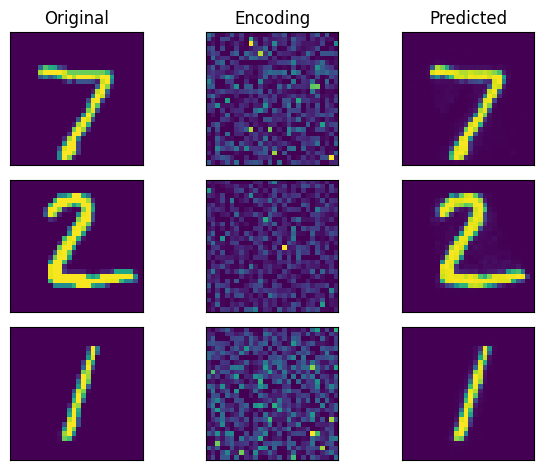

In [7]:
# Autoencoder with same number of bottleneck nodes as input image: 784
autoencoder_workflow(784, num_epochs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0529 - val_loss: 0.0165
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0150 - val_loss: 0.0113
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0113 - val_loss: 0.0104
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 12/25
1875/1875 ━━━━━━━

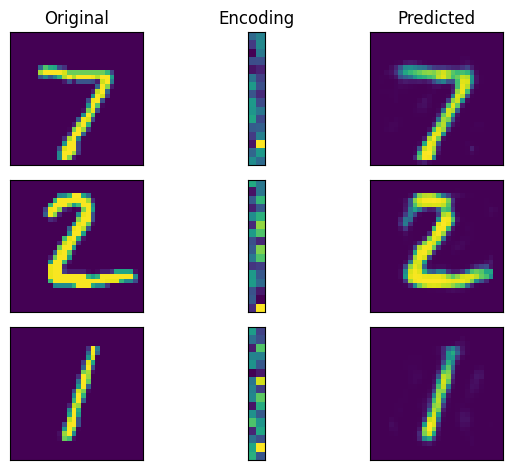

In [9]:
# Autoencoder with 32 bottleneck nodes
autoencoder_workflow(32, num_epochs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0623 - val_loss: 0.0267
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0261 - val_loss: 0.0235
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0234 - val_loss: 0.0222
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0224 - val_loss: 0.0217
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0221 - val_loss: 0.0215
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0220 - val_loss: 0.0213
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0217 - val_loss: 0.0212
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0216 - val_loss: 0.0211
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0215 - val_loss: 0.0210
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0214 - val_loss: 0.0209
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0214 - val_loss: 0.0209
Epoch 12/25
1875/1875 ━━━━━━━━

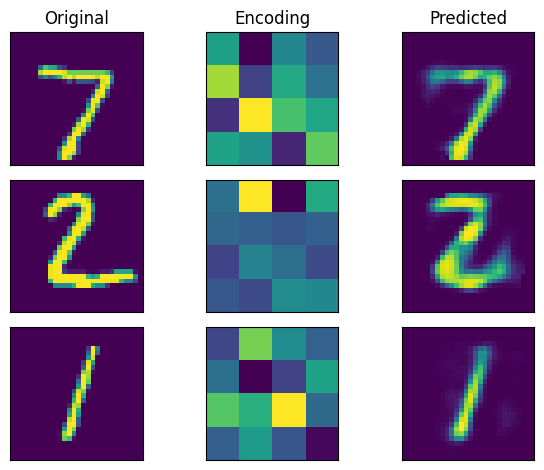

In [10]:
# Autoencoder with 16 bottleneck nodes
autoencoder_workflow(16, num_epochs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0716 - val_loss: 0.0381
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0377 - val_loss: 0.0358
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0359 - val_loss: 0.0347
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0349 - val_loss: 0.0342
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0344 - val_loss: 0.0339
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0341 - val_loss: 0.0337
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0340 - val_loss: 0.0336
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0341 - val_loss: 0.0335
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0340 - val_loss: 0.0335
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0340 - val_loss: 0.0334
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0339 - val_loss: 0.0334
Epoch 12/25
1875/1875 ━━━━━━━

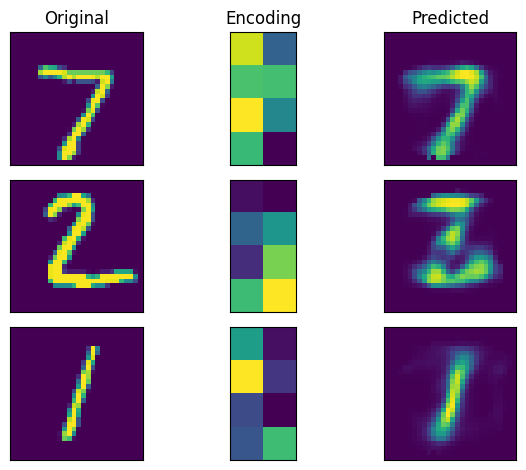

In [11]:
# Autoencoder with 8 bottleneck nodes
autoencoder_workflow(8, num_epochs)


In [2]:
def create_conv_autoencoder(input_shape):
    """Convolutional autoencoder architecture"""
    input_img = layers.Input(input_shape)

    encoded = layers.Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
    encoded = layers.MaxPooling2D((2, 2))(encoded)
    encoded = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(encoded)
    encoded = layers.MaxPooling2D((2, 2))(encoded)
    encoded = layers.Conv2D(4, (3, 3), activation="relu", padding="same")(encoded)
    encoded = layers.MaxPooling2D((2, 2), padding="same")(encoded)

    encoder_model = Model(input_img, encoded)  # dims: 4 feature maps with size 4 x 4 (64 bottleneck nodes)

    decoded = layers.Conv2D(4, (3, 3), activation="relu", padding="same")(encoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(8, (3, 3), activation="relu", padding="same")(decoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(16, (3, 3), activation="relu")(decoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(decoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1), loss="mse")

    return autoencoder, encoder_model


In [5]:
# Get training and test MNIST images
(train, _), (test, _) = mnist.load_data()

# Add color dimensions
train = (train.astype(np.float32) / 255).reshape((len(train), 28, 28, 1))
test = (test.astype(np.float32) / 255).reshape((len(test), 28, 28, 1))

# Get dimensions from example image
dims = train[0].shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Create autoencoder and associated encoder model
autoencoder, encoder = create_conv_autoencoder(dims)

# Configure stopping criterion via early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

# Train autoencoder
autoencoder.fit(train, train,
                validation_data=(test, test),
                batch_size=256,
                epochs=40,
                callbacks=[callback],)


Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 73s 301ms/step - loss: 0.1772 - val_loss: 0.0824
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 304ms/step - loss: 0.0760 - val_loss: 0.0644
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 294ms/step - loss: 0.0622 - val_loss: 0.0585
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 291ms/step - loss: 0.0574 - val_loss: 0.0552
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 292ms/step - loss: 0.0544 - val_loss: 0.0530
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 302ms/step - loss: 0.0525 - val_loss: 0.0512
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 297ms/step - loss: 0.0507 - val_loss: 0.0493
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 295ms/step - loss: 0.0490 - val_loss: 0.0480
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 307ms/step - loss: 0.0478 - val_loss: 0.0466
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 294ms/step - loss: 0.0464 - val_loss: 0.0453
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 80s 286ms/step - loss: 0.0453 - val_loss: 0.0442
Epoch 12/40
235/235

In [7]:
pred = autoencoder.predict(test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [8]:
def plot_with_filters(original, encoded, reconstructed, num_examples=1, num_filters=4):
    """Plot test set examples with original, filter activations and prediction"""

    assert num_filters <= encoded.shape[-1], \
    "num_filters={} exceeds number of available feature maps ({}).".format(num_filters, encoded.shape[-1])

    # Plotting parameters set to not show ticks and tick labels
    params = {"bottom": False,
              "left": False,
              "labelbottom": False,
              "labelleft": False}

    # Create a composite figure
    fig = plt.figure(figsize=(8, 8))
    gs = fig.add_gridspec(num_filters * num_examples, num_examples)

    # Originals and reconstructions
    for example_index in range(num_examples):
        # Left column
        ax = fig.add_subplot(gs[example_index * num_filters:(example_index + 1) * num_filters, 0])
        ax.imshow(original[example_index])
        ax.tick_params(**params)

        # Left column title
        if example_index == 0:
            ax.title.set_text("Original")

        # Right columns
        ax = fig.add_subplot(gs[example_index * num_filters:(example_index + 1) * num_filters, 2])
        ax.imshow(reconstructed[example_index])
        ax.tick_params(**params)

        # Right column title
        if example_index == 0:
            ax.title.set_text("Reconstruction")

    # Encodings
    for filter_index in range(num_filters * num_examples):
        ax = fig.add_subplot(gs[filter_index, 1])
        ax.imshow(encoded[int(filter_index / num_filters), :, :, filter_index % num_filters])
        ax.tick_params(**params)

        # Mid column title
        if filter_index == 0:
            ax.title.set_text("Encoding")

    # Auto-format and show figure
    plt.tight_layout()
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Test dimensions: (10000, 28, 28)
Encoded dimensions: (10000, 4, 4, 4)
Reconstructed dimensions: (10000, 28, 28)


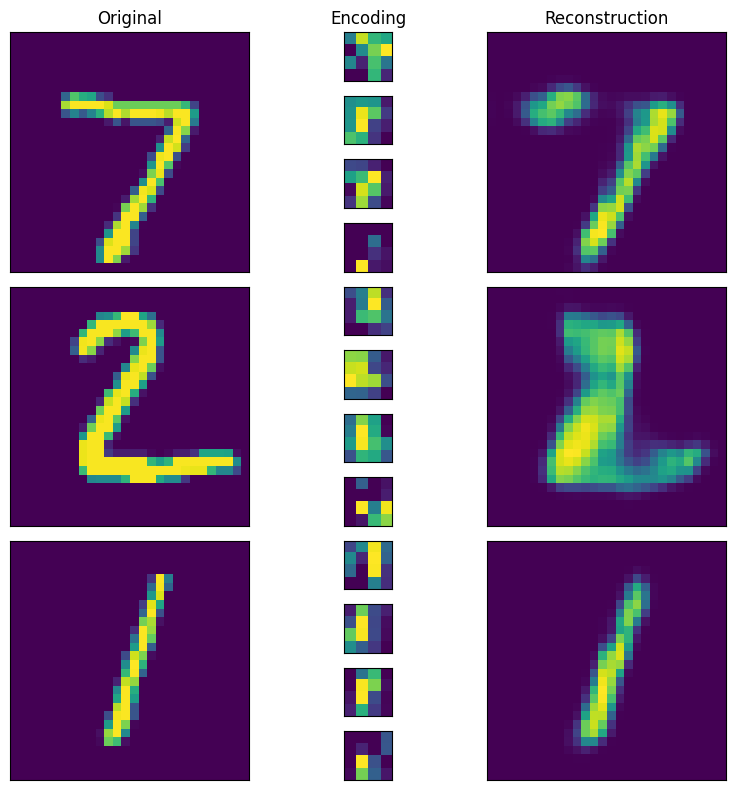

In [9]:
# Create encoded representation
encoded = encoder.predict(test)

# Reshaping image data for visualization
test_reshaped = test.reshape(len(test), dims[0], dims[1])
pred_reshaped = pred.reshape(len(pred), dims[0], dims[1])

# Display dimensions
print("Test dimensions:", test_reshaped.shape)
print("Encoded dimensions:", encoded.shape)
print("Reconstructed dimensions:", pred_reshaped.shape)

# Visualize three example images
plot_with_filters(test_reshaped, encoded, pred_reshaped, num_examples=3, num_filters=4)
